# SVM was used to determine the truth of the story

- Dataset:

# 1 Author

**Student Name**:  Boliang Chen  (陈柏良)<br/>
**Student ID**:    2022213028

# 2 Problem formulation

This project aims to use machine learning methods to determine whether a told story is true or fictional based on the characteristics of an audio file. We use a support vector machine (SVM) as a classification model and extract key speech features (such as MFCC, zero cross rate and spectral centroid) from the audio.

# 3 Methodology

Describe your methodology. Specifically, describe your training task and validation task, and how model performance is defined (i.e. accuracy, confusion matrix, etc). Any other tasks that might help you build your model should also be described here.

## Training:
- In the training task, we used a dataset containing audio files to train the SVM model (the training set made up 80% of the dataset).
- First, we extract key speech features from audio files, including MFCC, zero cross rate, and spectrum centroid. We then match these features with the corresponding labels (true story or false story).
- We use grid search to find a rough optimal combination of parameters, and then iterate over this set of parameters to find the best parameter with more than 80% accuracy to the training set (or terminate after 200 iterations).
## Validation:
- At the end of each training cycle, we use validation sets (20% of the dataset) to test the performance of the model to monitor the generalization ability of the model.
## Model Performance
- Accuracy: represents the proportion of samples predicted correctly by the model in the total samples.
- Confusion Matrix: Used to describe the performance of the model in the classification task, showing the distribution of real labels and predicted labels.
- Precision and Recall: The precision rate indicates how many of the samples predicted by the model to be positive are truly positive, and the recall rate indicates how many of the samples predicted by the model to be positive correctly.
- F1 Score: The conciliatory average of accuracy and recall, providing a comprehensive performance evaluation indicator.


# 4 Implemented ML prediction pipelines

Input: Audio file

Output: The truth of the story (true or deceptive)

Stages:
- Transition
- Model
- Integration

## 4.1 Transformation stage

Input  : Audio file (.wav format)
Output : Feature vector (15 dimensions)
Process:

Feature extraction
- MFCC: Extract 13 MFCC coefficients to capture the spectrum characteristics of the audio signal.
- Zero crossover rate (ZCR) : calculates the number of times an audio signal passes through a zero value point, reflecting speech speed and intonation.
- Spectral centroid: calculates the center of gravity of the spectrum, reflecting the frequency distribution.

These features were chosen because they effectively capture key information in audio signals, helping to distinguish between true stories and false ones.

## 4.2 Model stage

In the model stage, we use SVM model for classification.

1. Input  : Normalized eigenvectors
2. Output : Prediction label (true or deceptive)
3. Process :
- Data preprocessing:<br/>
Converts the label to numeric form(true is *0*,deception is *1*).<br/>
Adjust the feature to mean 0 and variance 1.

- Model training:<br/>
The SVM model is used for training, which was chosen because it performs well in small data sets and high-dimensional feature Spaces, and is able to handle nonlinear problems.

## 4.3 Ensemble stage

1.  Input:
The predictions of multiple models
2.  Output:
Final prediction tag
3.  Process:
- Voting method: <br/>
Combining the results of multiple models, the final prediction is determined by a majority vote.
- Weighted average:<br/> 
Each model is assigned a weight based on its performance, and the weighted average is calculated as the final prediction.

The integrated approach was chosen because of its ability to combine the strengths of multiple models to improve overall forecasting performance and stability.

# 5 Dataset

The main data set used in this project is the MLEnd Deception Dataset. The dataset contains multiple audio files, each of which corresponds to a story and is labeled with the authenticity of the story. We will extract features from these audio files and create a data set for training and validating the model.

Dataset Creation:
- Load audio files: Use librosa library to load audio files, get audio signals and sample rates.
- Feature extraction: Extract key features from audio signals, including MFCC, zero cross rate, and spectral center of mass.
- Tag matching: Read the authenticity tag of each audio file from the tag file and match it with the extracted features.
- Data standardization: Features are standardized using StandardScaler.
Data set partitioning: Use train_test_split to divide the data set into training sets (80%) and validation sets (20%).

Data set independence and IID samples:
In order to ensure the independence and IID (Independent identically distributed) samples of the training and validation sets, we randomly allocate the samples when dividing the dataset and ensure that the sample distribution in each subset is consistent with the original dataset.

Limitation:
- The small size of the data set may affect the generalization ability of the model.
- The selected feature may not fully capture all the key information in the audio signal, and further optimization of the feature extraction method may be required.

# 6 Experiments and results

In [1]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import joblib
import matplotlib.pyplot as plt

## 6.1 Loading audio file

Load audio with librosa.load() :<br/> The .wav file can be read directly and the audio signal  *y* and sampling rate *sr* can be returned, which is convenient for subsequent feature extraction and data preprocessing.<br/>
Each element in the audio_data list is a tuple of (filename, audio_signal, sampling_rate)

In [2]:
# Define the audio folder path
audio_folder = 'CBU0521DD_stories'

# List all.wav files
audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]

# Initializes the list used to store audio data
audio_data = []

# Load all audio files
for file in audio_files:
    file_path = os.path.join(audio_folder, file)  # Construct the file path
    y, sr = librosa.load(file_path, sr=None)  # Load the audio file
    audio_data.append((file, y, sr))  # Store file names, audio data, and sample rates as tuples

##  6.2. Extract audio features

### 1. Feature selection:

In machine learning, feature selection is a very important step because the performance of the model depends heavily on the quality of the features used. In this task, in order to extract the key information needed for classification from the audio data, the following three features were selected:<br/>

(1) MFCC: <br/>[librosa.feature.mfcc was used to extract 13 MFCC coefficients.]<br/>
- MFCC is a feature commonly used in speech processing tasks to effectively capture the spectral characteristics of audio signals.<br/>
- It extracts the spectrum envelope of the signal by mapping the spectrum information to a Mel Scale that is more in line with the auditory perception of the human ear.<br/>
- MFCC reflects phonetic characteristics in the audio, such as pitch, rhythm, and sound quality, which may be related to the speaker's behavior pattern (true or false).<br/>

(2) Zero crossing rate (ZCR) : [librosa.feature.zero_crossing_rate is used to calculate the zero crossing rate of audio, and its average value is taken as the feature.]<br/>
- ZCR is the number of times (or frequency) the audio signal passes through the zero value point.<br/>
- The speed and intonation of the speaker may affect the zero crossing rate. For example, fast or erratic presentations may correspond to higher ZCR.<br/>

(3) spectral centroid: <br/>[Librosa.features.spectral_centroid was used to calculate the spectral centroid, and its mean value was taken as the feature.]<br/>
- The spectral centroid represents the center of gravity of the spectrum, i.e. the weighted average of the frequency.<br/>
- Different modes of presentation may result in different frequency distributions. For example, true stories may be told more naturally, and false stories may have specific frequency signatures.

### 2. Feature vector structure:

- Each audio file generates a 15-dimensional feature vector: 13 MFCC means + 1 zero crossing rate + 1 spectral centroid.
- Because machine learning models can only deal with structured numerical data, the complexity of audio signals is reduced to fixed-dimensional feature vectors, which are easy to train and predict by input models.

### 3. Data and label matching:
- Read story truth-false information (Story_Type) from the matching label line.
- Take it as the label of the feature vector, so that the data feature vector and the label correspond to each other.

In [4]:
# Define a function to extract features
def extract_features(y, sr):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract MFCC
    mfcc_mean = np.mean(mfcc.T, axis=0)  # Calculate MFCC mean
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y))  # Zero crossing rate
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))  # Spectral centroid
    return np.concatenate((mfcc_mean, [zcr, spectral_centroid]))

# Initialize features and labels
features = []
labels = []

csv_file = 'CBU0521DD_stories_attributes.csv'
label_data = pd.read_csv(csv_file)

# Extract features for each audio file
for file, y, sr in audio_data:
    label_row = label_data[label_data['filename'] == file]
    if not label_row.empty:
        story_type = label_row['Story_type'].values[0]  # Get story truth label
        feature = extract_features(y, sr)  # Extract features
        features.append(feature)  # Add to feature list
        labels.append(story_type)  # Add corresponding label

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

## 6.3 Data preprocessing and data set partitioning

### 1. Label code:
- Convert True Story and Deceptive Story tags to numeric values (*0* and *1*) using LabelEncoder.

### 2. Feature standardization:
- Use StandardScaler to standardize features, adjusting the mean to *0* and the variance to *1* for each feature. This is to avoid the impact of eigenvalue scale differences on the model.

### 3. Data set partitioning:
- Use train_test_split to divide the data into a training set (80%) and a validation set (20%) in order to evaluate the generalization performance of the model.

In [5]:
# Tag coding
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

# Data standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Data set partitioning
X_train, X_val, y_train, y_val = train_test_split(scaled_features, encoded_labels, test_size=0.2, random_state=42)

## 6.4 Model training

The goal of SVM is to find an optimal hyperplane that maximizes the classification interval between different classes.
<br/><br/>
Why use SVM:
- The amount of data in this experiment is small, SVM can handle small data sets well, and overfitting is not easy (if neural network is used in this experiment, the risk of overfitting will be very high).
- A 15-dimensional audio feature vector is generated, and SVM can handle the problem of high-dimensional feature space well.
- Story truth may not be linearly separable, and by using Kernel, SVM can handle nonlinear problems and improve classification.

Cross-validation is used in the parameter grid to find the optimal SVM parameters.

#### 1. C
C Controls the tolerance of the model to misclassified samples, that is, the smoothness of the decision boundary.
- Small C values: allow for more misclassification, smoother decision boundaries, and help avoid overfitting.
- Large C values: Reduced tolerance for misclassification, tend to classify all samples correctly, but can lead to overfitting.

#### 2. Gamma
Gamma controls the influence range of the sample points and determines the nonlinear capability of the model.
- Small gamma: Larger range of influence per sample, smoother model.
- Large gamma: Each sample has a smaller range of influence, the model is more complex, and can fit more samples.
#### 3. Kernel
Kernel determines how features are divided and processed.
- linear: Linear kernel, suitable for linearly separable samples.
- rbf (Radial Core) : Suitable for nonlinear data.
- poly (polynomial kernel) : suitable for data with polynomial relationships, high complexity.
sigmoid: Similar to the neural network activation function.

### Step 1: Divide the grid to find the best combination of parameters.
- Traverses all combinations of C (regularization parameter), gamma (kernel function parameter), and kernel (kernel function type).
- Cross validation (cv=5): The training set is divided into 5 parts, which are used as validation sets to evaluate the generalization performance of the model.
- Output the parameter combination with the highest cross-validation accuracy.

In [6]:
# Step 1: Use grid search to find roughly the best kernel function and the corresponding C and gamma
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Define the SVM model
svm = SVC()

# Create a grid search object, using cross validation
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Grid search on the training set
grid_search.fit(X_train, y_train)

# Output the best parameter and corresponding model
print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Best Cross-Validation Score from Grid Search:", grid_search.best_score_)

# Get the best kernel function and the corresponding two sets of C and gamma
best_kernel = grid_search.best_params_['kernel']
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters from Grid Search: {'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}
Best Cross-Validation Score from Grid Search: 0.55


### Step 2 : Iterate over the best combination of parameters found

Since the parameters found in step 1 are the best combination in a very wide range, we want to improve the fitting ability of the model in step 2.<br/>
So we're going to increase C and decrease gamma.

Iteration 1: C=10, gamma=0.1, kernel=sigmoid, Train Accuracy=0.45, Validation Accuracy=0.5
Iteration 2: C=11.0, gamma=0.09090909090909091, kernel=sigmoid, Train Accuracy=0.4375, Validation Accuracy=0.55
Iteration 3: C=12.100000000000001, gamma=0.08264462809917356, kernel=sigmoid, Train Accuracy=0.475, Validation Accuracy=0.55
Iteration 4: C=13.310000000000002, gamma=0.07513148009015777, kernel=sigmoid, Train Accuracy=0.4375, Validation Accuracy=0.4
Iteration 5: C=14.641000000000004, gamma=0.06830134553650706, kernel=sigmoid, Train Accuracy=0.475, Validation Accuracy=0.4
Iteration 6: C=16.105100000000004, gamma=0.0620921323059155, kernel=sigmoid, Train Accuracy=0.4875, Validation Accuracy=0.4
Iteration 7: C=17.715610000000005, gamma=0.056447393005377725, kernel=sigmoid, Train Accuracy=0.475, Validation Accuracy=0.5
Iteration 8: C=19.487171000000007, gamma=0.051315811823070656, kernel=sigmoid, Train Accuracy=0.475, Validation Accuracy=0.55
Iteration 9: C=21.43588810000001, gamma=0.046650

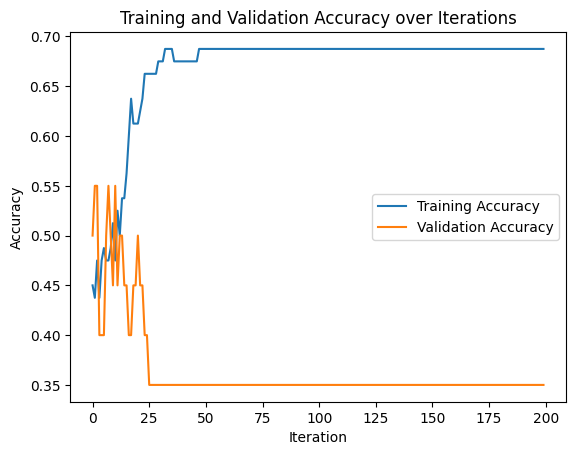

Validation Accuracy: 0.35


In [7]:
# Step 2: Iterate over the best combination of parameters found

# Initialization parameter
C = best_C
gamma = best_gamma
kernel = best_kernel

# The training accuracy and validation accuracy of each iteration were recorded
train_accuracies = []
val_accuracies = []

# Maximum iterations
max_iterations = 200

# Iterative process
for i in range(max_iterations):
    # Define the SVM model
    svm = SVC(C=C, gamma=gamma, kernel=kernel)
    
    # Train the model on the training set
    svm.fit(X_train, y_train)
    
    # Make predictions on the training set
    y_train_pred = svm.predict(X_train)
    
    # Calculate the accuracy on the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Make predictions on validation sets
    y_val_pred = svm.predict(X_val)
    
    # Calculate the accuracy on the verification set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)
    
    # Output the current parameters and accuracy
    print(f"Iteration {i+1}: C={C}, gamma={gamma}, kernel={kernel}, Train Accuracy={train_accuracy}, Validation Accuracy={val_accuracy}")
    
    # Termination condition
    if train_accuracy > 0.8 or i == max_iterations - 1:
        break
    
    # Update parameter
    C *= 1.1 
    gamma /= 1.1 

# Output the best parameters and training accuracy
print("Best Parameters after Iteration:", {'C': C, 'gamma': gamma, 'kernel': kernel})
print("Best Training Accuracy:", train_accuracy)

# Plot the change of accuracy of training set and verification set
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Iterations')
plt.legend()
plt.show()

# Use the best parameters to make predictions on the validation set
best_model = SVC(C=C, gamma=gamma, kernel=kernel)
best_model.fit(X_train, y_train)
y_val_pred = best_model.predict(X_val)

# Calculate the accuracy on the verification set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

# 7 Conclusions
- Best Parameters after Iteration: {'C': 211.13776745352607, 'gamma': 0.004736244074476691, 'kernel': 'sigmoid'}
- Best Training Accuracy: 0.6875
- Result：The accuracy of model application and validation set is 0.35

By observing the images, we can see that the model has overfitting at this time, and the generalization ability is poor.

The best iteration parameter should be generated when the iteration is 20-25 times, when the accuracy of the training set and the verification set are roughly 0.5.

Iteration 1: C=10, gamma=0.1, kernel=sigmoid, Train Accuracy=0.45, Validation Accuracy=0.5
Iteration 2: C=11.0, gamma=0.09090909090909091, kernel=sigmoid, Train Accuracy=0.4375, Validation Accuracy=0.55
Iteration 3: C=12.100000000000001, gamma=0.08264462809917356, kernel=sigmoid, Train Accuracy=0.475, Validation Accuracy=0.55
Iteration 4: C=13.310000000000002, gamma=0.07513148009015777, kernel=sigmoid, Train Accuracy=0.4375, Validation Accuracy=0.4
Iteration 5: C=14.641000000000004, gamma=0.06830134553650706, kernel=sigmoid, Train Accuracy=0.475, Validation Accuracy=0.4
Iteration 6: C=16.105100000000004, gamma=0.0620921323059155, kernel=sigmoid, Train Accuracy=0.4875, Validation Accuracy=0.4
Iteration 7: C=17.715610000000005, gamma=0.056447393005377725, kernel=sigmoid, Train Accuracy=0.475, Validation Accuracy=0.5
Iteration 8: C=19.487171000000007, gamma=0.051315811823070656, kernel=sigmoid, Train Accuracy=0.475, Validation Accuracy=0.55
Iteration 9: C=21.43588810000001, gamma=0.046650

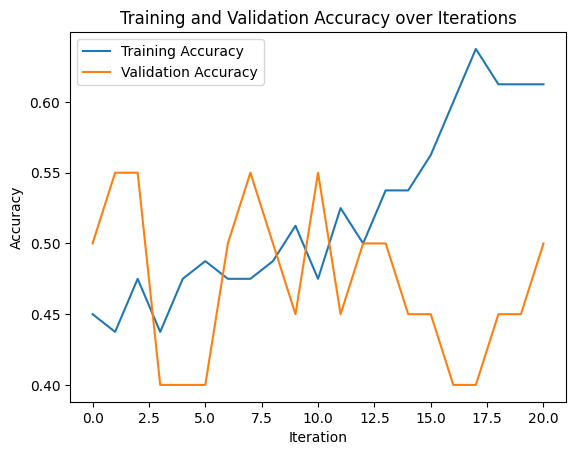

Validation Accuracy: 0.5


In [ ]:
# Step 2: Iterate over the best combination of parameters found

# Initialization parameter
C = best_C
gamma = best_gamma
kernel = best_kernel

# The training accuracy and validation accuracy of each iteration were recorded
train_accuracies = []
val_accuracies = []

# Maximum iterations
max_iterations = 21

# Iterative process
for i in range(max_iterations):
    # Define the SVM model
    svm = SVC(C=C, gamma=gamma, kernel=kernel)
    
    # Train the model on the training set
    svm.fit(X_train, y_train)
    
    # Make predictions on the training set
    y_train_pred = svm.predict(X_train)
    
    # Calculate the accuracy on the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Make predictions on validation sets
    y_val_pred = svm.predict(X_val)
    
    # Calculate the accuracy on the verification set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)
    
    # Output the current parameters and accuracy
    print(f"Iteration {i+1}: C={C}, gamma={gamma}, kernel={kernel}, Train Accuracy={train_accuracy}, Validation Accuracy={val_accuracy}")
    
    # Termination condition
    if train_accuracy > 0.8 or i == max_iterations - 1:
        break
    
    # Update parameter
    C *= 1.1 
    gamma /= 1.1 

# Output the best parameters and training accuracy
print("Best Parameters after Iteration:", {'C': C, 'gamma': gamma, 'kernel': kernel})
print("Best Training Accuracy:", train_accuracy)

# Plot the change of accuracy of training set and verification set
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Iterations')
plt.legend()
plt.show()

# Use the best parameters to make predictions on the validation set
best_model = SVC(C=C, gamma=gamma, kernel=kernel)
best_model.fit(X_train, y_train)
y_val_pred = best_model.predict(X_val)

# Calculate the accuracy on the verification set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

We can obtain the optimal number of iterations is 21, and the model parameters are <br/>
{'C': 67.2749994932561, 'gamma': 0.014864362802414351, 'kernel': 'sigmoid'}<br/>
The training set accuracy is 0.6 and the verification set accuracy is 0.5

Improvement suggestion: To use equal-spacing grid in grid search, find the best combinations of multiple groups, and optimize them iteratively with a single parameter

In [ ]:
# Save the best model
model_filename = "determine_story_svm.pkl"
joblib.dump(best_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to determine_story_svm.pkl


# 8 References

- Librosa: Python library for audio processing and feature extraction. <br/>reference----Librosa: Audio and Music Signal Analysis in Python
- Scikit-learn: Python library for building and evaluating machine learning models.<br/>reference----Scikit-learn: Machine Learning in Python
- Pandas: Python library for data processing and analysis. <br/>reference----Pandas: Python Data Analysis Library
- Matplotlib: Python library for data visualization.<br/>reference----Matplotlib: Python Plotting
- GridSearchCV: A tool in Scikit-learn for hyperparameter optimization.<br/>reference----GridSearchCV Documentation
- Joblib: Python library for model saving.<br/>reference----Joblib: Efficient computation with Python